# Ads Click Through Rate Prediction

Ads Click Through Rate is the ratio of how many users clicked on your ad to how many users viewed your ad. For example, 5 out of 100 users click on the ad while watching a youtube video. So, in this case, the CTR of the youtube ad will be 5%. Analyzing the click-through rate help companies in finding the best ad for their target audience.

Ads Click-through rate prediction means predicting whether the user will click on the ad. In the task of ads click-through rate prediction, we need to train a Machine Learning model to find relationships between the characteristics of all the users who click on ads. The dataset that will be used can be downloded from [here](https://statso.io/click-through-rate-analysis-case-study/)

## Ads Click-Through Rate Prediction using Python

Let’s start the task of ads click-through rate prediction by importing the necessary Python libraries and the dataset:

In [20]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv("ad_10000records.csv")
print(data.head())

   Daily Time Spent on Site   Age  Area Income  Daily Internet Usage  \
0                     62.26  32.0     69481.85                172.83   
1                     41.73  31.0     61840.26                207.17   
2                     44.40  30.0     57877.15                172.83   
3                     59.88  28.0     56180.93                207.17   
4                     49.21  30.0     54324.73                201.58   

                         Ad Topic Line             City  Gender  \
0      Decentralized real-time circuit         Lisafort    Male   
1       Optional full-range projection  West Angelabury    Male   
2  Total 5thgeneration standardization        Reyesfurt  Female   
3          Balanced empowering success      New Michael  Female   
4  Total 5thgeneration standardization     West Richard  Female   

                        Country            Timestamp  Clicked on Ad  
0  Svalbard & Jan Mayen Islands  2016-06-09 21:43:05              0  
1                     Si

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  10000 non-null  float64
 1   Age                       10000 non-null  float64
 2   Area Income               10000 non-null  float64
 3   Daily Internet Usage      10000 non-null  float64
 4   Ad Topic Line             10000 non-null  object 
 5   City                      10000 non-null  object 
 6   Gender                    10000 non-null  object 
 7   Country                   10000 non-null  object 
 8   Timestamp                 10000 non-null  object 
 9   Clicked on Ad             10000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 781.4+ KB


In [23]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,61.660757,35.940100,53840.047721,177.759831,0.491700
std,15.704142,8.572973,13343.708718,40.820951,0.499956
min,32.600000,19.000000,13996.500000,105.220000,0.000000
25%,48.860000,29.000000,44052.302500,140.150000,0.000000
50%,59.590000,35.000000,56180.930000,178.920000,0.000000
75%,76.580000,42.000000,61840.260000,212.670000,1.000000
max,90.970000,60.000000,79332.330000,269.960000,1.000000


In [24]:
unique_counts = data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Clicked on Ad']].nunique()
unique_counts

Daily Time Spent on Site    460
Age                          39
Area Income                 524
Daily Internet Usage        505
Clicked on Ad                 2
dtype: int64

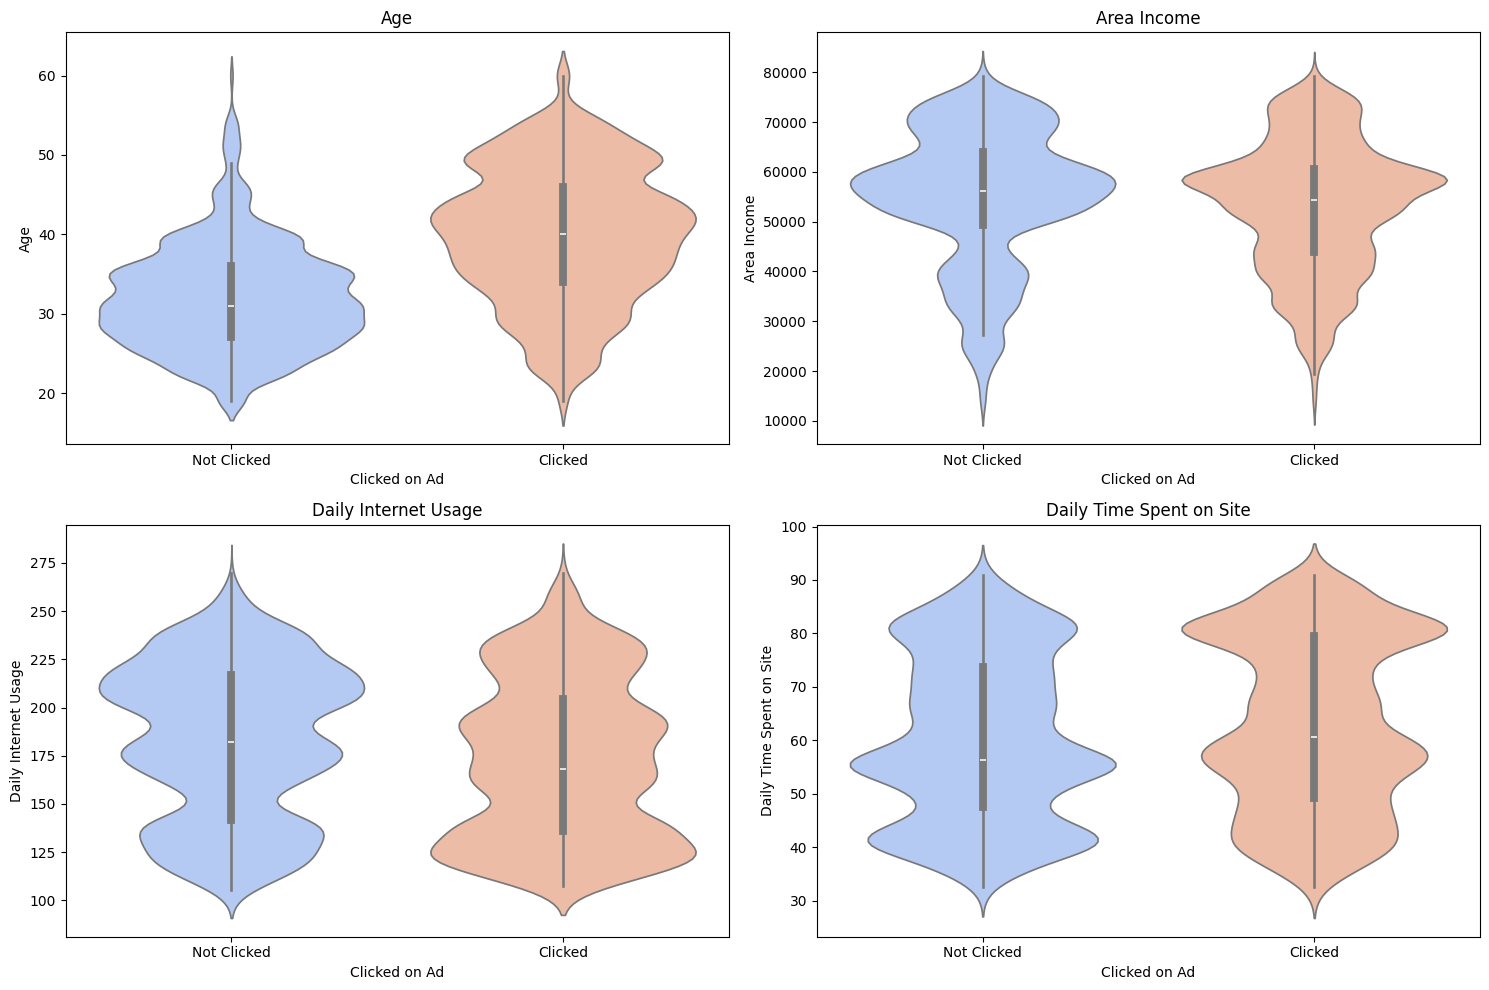

In [25]:
data['Clicked on Ad'] = data["Clicked on Ad"].map({0: "Not Clicked", 1: "Clicked"})

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

sns.violinplot(x='Clicked on Ad', y='Age', hue='Clicked on Ad', data=data, palette='coolwarm', ax=axs[0, 0])
axs[0, 0].set_title('Age')

sns.violinplot(x='Clicked on Ad', y='Area Income', hue='Clicked on Ad',data=data, palette='coolwarm', ax=axs[0, 1])
axs[0, 1].set_title('Area Income')

sns.violinplot(x='Clicked on Ad', y='Daily Internet Usage', hue='Clicked on Ad', data=data, palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title('Daily Internet Usage')

sns.violinplot(x='Clicked on Ad', y='Daily Time Spent on Site', hue='Clicked on Ad',data=data, palette='coolwarm', ax=axs[1, 1])
axs[1, 1].set_title('Daily Time Spent on Site')

plt.tight_layout()
plt.show()

The “Clicked on Ad” column contains 0 and 1 values, where 0 means not clicked, and 1 means clicked. We’ll transform these values into “yes” and “no”:

In [5]:
data["Clicked on Ad"] = data["Clicked on Ad"].map({0: "No", 1: "Yes"})

## Click through rate analysis

Now let’s analyze the click-through rate based on the time spent by the users on the website

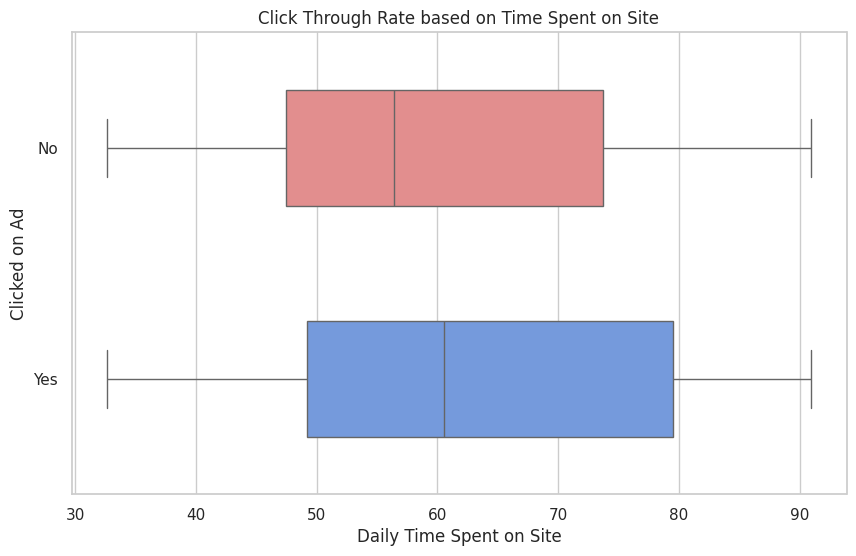

In [6]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x="Daily Time Spent on Site",
                       y="Clicked on Ad",
                       hue="Clicked on Ad",
                       data=data,
                       palette={'Yes':'cornflowerblue' ,'No':'lightcoral'},
                      dodge=False,
                      width=0.5)

plt.title("Click Through Rate based on Time Spent on Site")
plt.show()

From the above graph, we can see that the users who spend more time on the website click more on ads. Now let’s analyze the click-through rate based on the daily internet usage of the user:

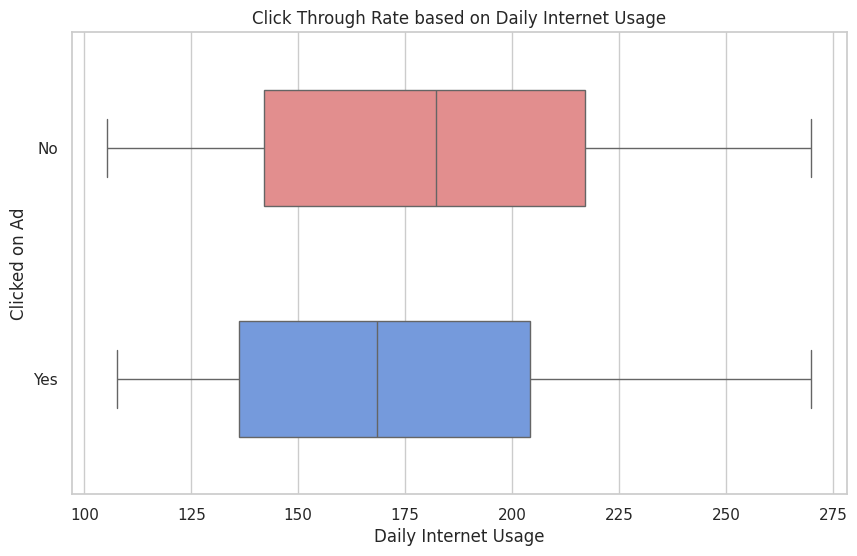

In [7]:
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x="Daily Internet Usage",
                       y="Clicked on Ad",
                       hue="Clicked on Ad",
                       data=data,
                       palette={'Yes':'cornflowerblue' ,'No':'lightcoral'},
                      dodge=False,
                      width=0.5)

plt.title("Click Through Rate based on Daily Internet Usage")
plt.show()

From the above graph, we can see that the users with high internet usage click less on ads compared to the users with low internet usage. Now let’s analyze the click-through rate based on the age of the users:

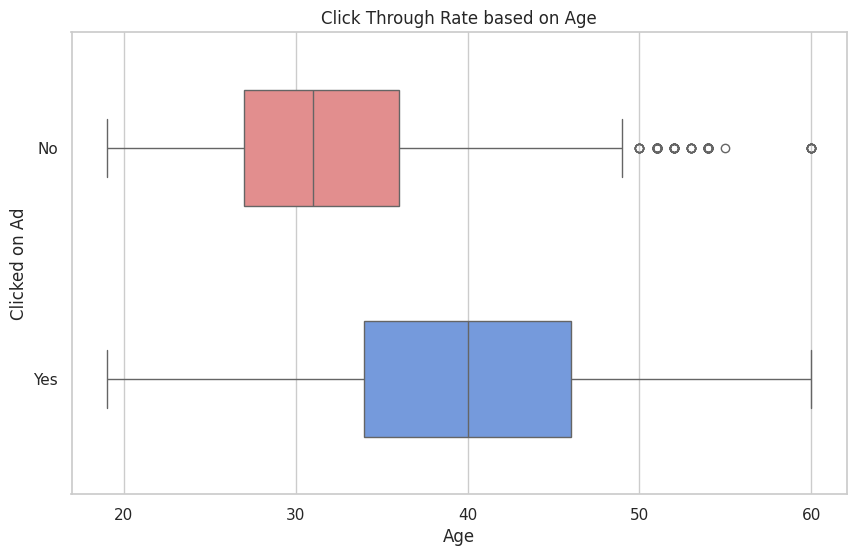

In [8]:
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x="Age",
                       y="Clicked on Ad",
                       hue="Clicked on Ad",
                       data=data,
                       palette={'Yes':'cornflowerblue' ,'No':'lightcoral'},
                      dodge=False,
                      width=0.5)

plt.title("Click Through Rate based on Age")
plt.show()

From the above graph, we can see that users around 40 years click more on ads compared to users around 27-36 years old. Now let’s analyze the click-through rate based on the income of the users:

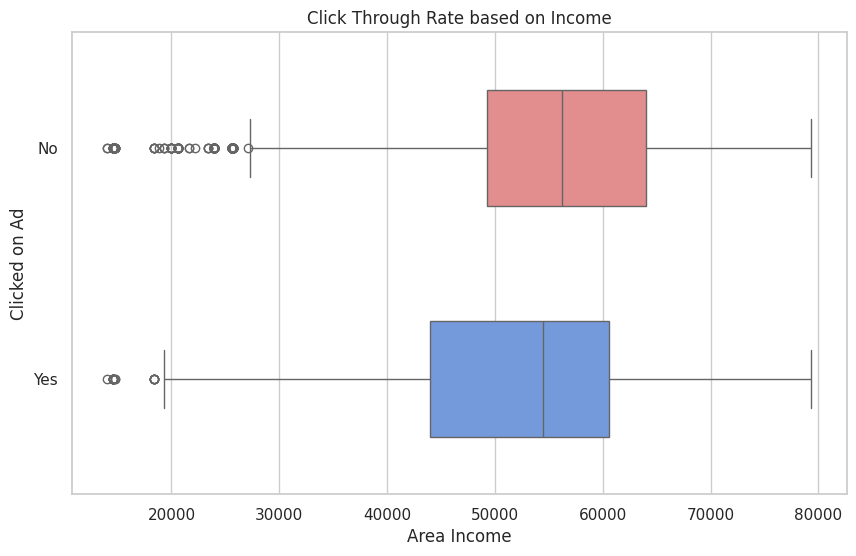

In [10]:
plt.figure(figsize=(10, 6))
box_plot = sns.boxplot(x="Area Income",
                       y="Clicked on Ad",
                       hue="Clicked on Ad",
                       data=data,
                       palette={'Yes':'cornflowerblue' ,'No':'lightcoral'},
                      dodge=False,
                      width=0.5)

plt.title("Click Through Rate based on Income")
plt.show()

There’s not much difference, but people from high-income areas click less on ads.

## Calculating CTR of Ads

Now let’s calculate the overall Ads click-through rate. Here we need to calculate the ratio of users who clicked on the ad to users who left an impression on the ad. So let’s see the distribution of users:


In [11]:
data["Clicked on Ad"].value_counts()

Clicked on Ad
No     5083
Yes    4917
Name: count, dtype: int64

So 4917 out of 10000 users clicked on the ads. Let’s calculate the CTR:

In [12]:
click_through_rate = 4917 / 10000 * 100
print(click_through_rate)

49.17


So the CTR is 49.17

## Click Through Rate Prediction Model

Now let’s move on to training a Machine Learning model to predict click-through rate. I’ll start by dividing the data into training and testing sets:


In [13]:
data["Gender"] = data["Gender"].map({"Male": 1,
                               "Female": 0})

x=data.iloc[:,0:7]
x=x.drop(['Ad Topic Line','City'],axis=1)
y=data.iloc[:,9]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,
                                           test_size=0.2,
                                           random_state=4)

Now let’s train the model using the random forecast classification algorithm:

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x, y)

RandomForestClassifier()

Now let’s have a look at the accuracy of the model:

In [15]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(xtest)
print(accuracy_score(ytest,y_pred))

0.957


Now let’s test the model by making predictions:

In [18]:
print("Ads Click Through Rate Prediction : ")
a = float(input("Daily Time Spent on Site: "))
b = float(input("Age: "))
c = float(input("Area Income: "))
d = float(input("Daily Internet Usage: "))
e = input("Gender (Male = 1, Female = 0) : ")

features = pd.DataFrame({
    'Daily Time Spent on Site': [a],
    'Age': [b],
    'Area Income': [c],
    'Daily Internet Usage': [d],
    'Gender': [e]
})

print("Will the user click on ad = ", model.predict(features))

Ads Click Through Rate Prediction : 


Daily Time Spent on Site:  30
Age:  30
Area Income:  30000
Daily Internet Usage:  300
Gender (Male = 1, Female = 0) :  0


Will the user click on ad =  ['Yes']


## Summary

So this is how you can use Machine Learning for the task of Ads CTR prediction using Python. Ads CTR means predicting whether the user will click on the ad. In this task, we need to train a Machine Learning model to find relationships between the characteristics of all the users who click on ads. I hope you liked this article on Ads Click Through Rate prediction with Machine Learning using Python. Feel free to ask valuable questions in the comments section below.